Sources:

https://scikit-learn.org/stable/modules/svm.html
https://levelup.gitconnected.com/text-cleansing-in-nlp-tasks-594b93d648d6
https://medium.com/analytics-vidhya/comprehensive-hands-on-guide-to-twitter-sentiment-analysis-with-dataset-and-code-960c055ada3f
https://www.kaggle.com/datasets/kazanova/sentiment140
https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
https://www.kaggle.com/code/stoicstatic/twitter-sentiment-analysis-for-beginners?scriptVersionId=68181216
https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/#:~:text=Stemming%20is%20a%20process%20that,form%2C%20which%20is%20called%20Lemma.


In [1]:
import pandas as pd

import nltk
nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer

import spacy
spacy.load('en_core_web_sm')


import re

import seaborn as sns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pd. set_option('display.max_rows', 10)
pd. set_option('display.max_columns', None)
pd. set_option('display.width', None)
pd. set_option('display.max_colwidth', None)

In [3]:
# getting tweets from CSV
tweetsDf = pd.read_csv("twitterDataOutput.csv")
print("dataframe shape: " + str(tweetsDf.shape) )

tweetsDf.head(5)

dataframe shape: (448740, 3)


,date,id,tweet
0,2022-05-31T23:14:24.000Z,1531776135083720711,"@FilipinoFollies It’s outdated. 3rd has negative connotations like the Philippines is somehow in 3rd place, Filipinos are in fact winning, at least those Filipinos who are not negative like yourself sir."
1,2022-05-31T22:17:29.000Z,1531761813922136065,A Japan song title feeling very topical at the moment. So is the B-side unfortunately. https://t.co/OkAqdLGwxH
2,2022-05-31T22:09:18.000Z,1531759753071845376,"@FurnaceFear @Jo_dB Although it cuts off before my favourite line from Adolf Martin 'and you see, I think it all started going wrong when the Japanese arrived....'"
3,2022-05-31T22:05:43.000Z,1531758850273050626,#Bradford is trending on @Twitter! We have been waiting for #CityofCulture2025 It's our place &amp; our time @FoxandWindmill the UK's first indie publisher for British South Asians is based right here in #Bradford and we'll always back our beautiful city as proud Bradfordians🦊 https://t.co/5bg3y8tXaN
4,2022-05-31T22:04:05.000Z,1531758441521467395,This was a light day in Vietnam back in my World At War days during game chat. Sorry Kat. https://t.co/BHYEVC7jyL


In [4]:
sentiment140Df = pd.read_csv("sentiment140.training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None, usecols=[0,5], names=["sentimentScore", "tweet"])
print("dataframe shape: " + str(sentiment140Df.shape) )

#  Sentiment column (0 = negative, 4 = positive)
print(sentiment140Df.columns.values)
# replace 4 with 1 (0 = negative, 1 = positive)
sentiment140Df['sentimentScore'] = sentiment140Df['sentimentScore'].replace(4,1)
sentiment140Df.head(5)

dataframe shape: (1600000, 2)
['sentimentScore' 'tweet']


,sentimentScore,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [5]:
def labelTrainingSentiment(score):
    if score == 0:
        return 'negative'
    if score == 1:
        return 'positive'


sentiment140Df['label'] = sentiment140Df['sentimentScore'].apply(lambda x: labelTrainingSentiment(x))
sentiment140Df.head(5)

,sentimentScore,tweet,label
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",negative
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,negative
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,negative
3,0,my whole body feels itchy and like its on fire,negative
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",negative


number of sentiment140 positive tweets: 800000
number of sentiment140 negative tweets: 800000


[Text(0.5, 1.0, 'Number of positive and negative tweets in Sentiment140 training data')]

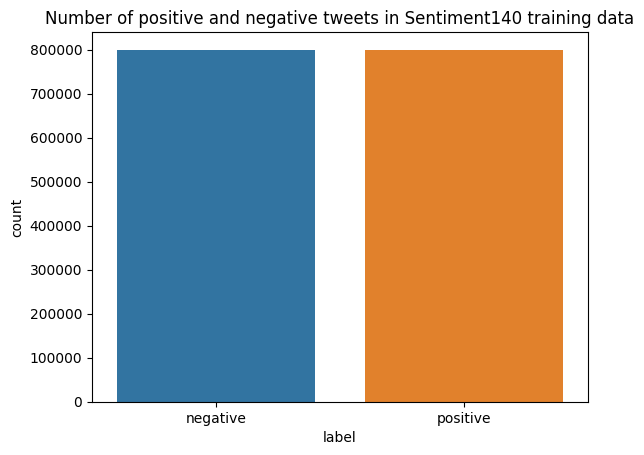

In [6]:
sentiment140Positive = sentiment140Df[sentiment140Df['label'] == 'positive']
sentiment140Negative = sentiment140Df[sentiment140Df['label'] == 'negative']
print("number of sentiment140 positive tweets: " + str(sentiment140Positive.shape[0]))
print("number of sentiment140 negative tweets: " + str(sentiment140Negative.shape[0]))
sns.countplot(x=sentiment140Df['label'], label= 'count').set(title='Number of positive and negative tweets in Sentiment140 training data')


In [7]:
# This emoji's dicitonary was taken from:
# https://www.kaggle.com/code/stoicstatic/twitter-sentiment-analysis-for-beginners?scriptVersionId=68181216

emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
        
stops = stopwords.words('english')

def appendStopsNoApostrophes(wordList):
    newList = wordList
    for word in wordList:
        if word.find("'") != -1:
            newList.append(word.replace("'", ""))
            newList.remove(word)
    return newList

stops = appendStopsNoApostrophes(stops)

htmlStops = ["&nbsp;", "nbsp", "&lt;", "lt", "&gt;", "gt", "&amp;", "amp", "&quot;", "quot", "&apos;", "apos",
 "&cent;", "&pound;", "&yen;", "&euro;", "&copy;", "&reg;", "reg"]

stops.extend(htmlStops)

STOPWORDS = set(stops)

print(STOPWORDS)




{'hasn', 'them', 'not', 'after', 'herself', 'should', 'there', 'the', 'itself', 'in', 'she', 'shes', 'been', 'his', 'her', 'wont', 'again', 'below', 'themselves', 'who', 'hadnt', 'own', 'out', '&apos;', 'or', '&reg;', 'youre', 'too', 'as', 'their', 'this', 'mustnt', '&amp;', 'most', 'over', 'theirs', 'ma', 'shouldve', 'll', 'couldn', 'mightn', 'isn', 'will', 'apos', 'did', 'mustn', 'was', 'are', 'hasnt', 'couldnt', 'just', 'ain', 'all', 'through', 'himself', 'isnt', 'by', 'with', 'had', 'during', 'shan', 'if', 'while', 'me', 'doing', 'here', 'mightnt', 'down', 'further', '&copy;', 'and', 'he', 't', 'be', 'how', 'doesn', 'm', 'youll', 'has', 'won', 'lt', '&gt;', 'of', "you'd", 'then', 'i', 'arent', 'against', 'yours', 'until', '&nbsp;', 'yourself', 'from', 'd', 'thatll', 'shouldnt', 've', 'wouldn', 'above', 'you', 's', 'is', 'neednt', 'haven', 'those', 'these', 'before', 'amp', 'y', 'now', 'other', '&euro;', 'do', 'such', '&quot;', '&yen;', 'does', 'shouldn', 'can', 'at', 'up', 'doesnt'

In [8]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
urlPattern2 = "((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = "(@[A-Za-z0-9_]+)"
print(urlPattern)
print(urlPattern2)
print(userPattern)

((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)
((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)
(@[A-Za-z0-9_]+)


In [9]:

# urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
regex_url = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
regex_url2 = "https?://[A-Za-z0-9./]*"
regex_user = "(@[A-Za-z0-9_]+)"

# cleaning tweet
def cleanTweet(tweet):
    # to lower case
    cleanTweet = tweet.lower()
    #removing leading and trailing whitespace
    cleanTweet = cleanTweet.strip()
    # remove whitespaces
    cleanTweet = ' '.join(cleanTweet.split())
    # remove user mentions
    cleanTweet = re.sub(regex_user,"", cleanTweet)
    # remove urls
    cleanTweet = re.sub(regex_url,"", cleanTweet)
    #replace emojis with text
    for key in emojis.keys():
        cleanTweet = cleanTweet.replace(key, emojis[key])
    # remove non alpha characters
    cleanTweet = re.sub("[^a-zA-Z ]","", cleanTweet)
    return cleanTweet


def removeStops(tweet):
    return " ".join([word for word in str(tweet).split() if word not in STOPWORDS])
  
nlp = spacy.load("en_core_web_sm",  disable=['parser', 'ner'])

def lemmatize(tweet):
    # lemmatizing words
    doc = nlp(tweet)
    cleanTweet = " ".join([token.lemma_ for token in doc])
    return cleanTweet

def removeShortWords(tweet):
    return " ".join([word for word in str(tweet).split() if len(word) > 2])

def noStopsNoShortLem(tweet):
    processedTweet = removeStops(tweet)
    processedTweet = lemmatize(processedTweet)
    processedTweet = removeShortWords(processedTweet)
    return processedTweet


    
    

In [10]:
sentiment140Df['cleanTweet'] = sentiment140Df['tweet'].apply(lambda x:cleanTweet(x))
sentiment140Df.head()

,sentimentScore,tweet,label,cleanTweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",negative,awww thats a bummer you shoulda got david carr of third day to do it wink
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,negative,is upset that he cant update his facebook by texting it and might cry as a result school today also blah
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,negative,i dived many times for the ball managed to save the rest go out of bounds
3,0,my whole body feels itchy and like its on fire,negative,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",negative,no its not behaving at all im mad why am i here because i cant see you all over there


In [11]:
sentiment140Df['lemmatizedTweet'] = sentiment140Df['cleanTweet'].apply(lambda x:noStopsNoShortLem(x))
sentiment140Df.head()

,sentimentScore,tweet,label,cleanTweet,lemmatizedTweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",negative,awww thats a bummer you shoulda got david carr of third day to do it wink,awww that bummer shoulda get david carr third day wink
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,negative,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,upset can not update facebook texting might cry result school today also blah
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,negative,i dived many times for the ball managed to save the rest go out of bounds,dive many time ball manage save rest bound
3,0,my whole body feels itchy and like its on fire,negative,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",negative,no its not behaving at all im mad why am i here because i cant see you all over there,behave mad can not see


In [17]:
#creating a column with stopwords removed but without lemmatization
sentiment140Df['unLemNoStops'] = sentiment140Df['cleanTweet'].apply(lambda x:removeShortWords(removeStops(x)))
sentiment140Df.head()

,sentimentScore,tweet,label,cleanTweet,lemmatizedTweet,unLemNoStops
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",negative,awww thats a bummer you shoulda got david carr of third day to do it wink,awww that bummer shoulda get david carr third day wink,awww thats bummer shoulda got david carr third day wink
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,negative,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,upset can not update facebook texting might cry result school today also blah,upset cant update facebook texting might cry result school today also blah
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,negative,i dived many times for the ball managed to save the rest go out of bounds,dive many time ball manage save rest bound,dived many times ball managed save rest bounds
3,0,my whole body feels itchy and like its on fire,negative,my whole body feels itchy and like its on fire,whole body feel itchy like fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",negative,no its not behaving at all im mad why am i here because i cant see you all over there,behave mad can not see,behaving mad cant see


In [18]:
sentiment140Df.to_csv("sentiment140Processed.csv", sep=",", index=False)